In [128]:
import pandas as pd
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.2f}".format

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from my_scripts.helper import bar_plot

In [3]:
file_path = '../data/impression_log.csv'
df = pd.read_csv(file_path)
df = df.set_index(df.columns[0])
df.head()

,LogEntryTime,AdvertiserId,CampaignId,AdGroupId,AudienceID,CreativeId,AdFormat,Frequency,Site,FoldPosition,Country,Region,City,DeviceType,OSFamily,OS,Browser,DeviceMake,AdvertiserCurrency,click,engagement,video-end,video-start
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,
00006a06-14e2-47d9-b999-fbeeac67dd2b,2021-09-25 00:22:37,868ko1s,t29si1w,e9qf2dm,0,9wkrkl5j,300x250,0,scrabblewordfinder.org,4,United States,New York,Staten Island,4,5.00,173.00,7.00,Apple,0.01,0,0,0,0
00007898-29c9-43f1-82e5-43c5a856d0f4,2021-09-25 02:31:35,868ko1s,fiwemi8,8m750eh,0,zhre4utp,300x250,0,www.thecoli.com,2,United States,Massachusetts,Milton,4,5.00,173.00,7.00,Apple,0.00,0,0,0,0
0000d06f-5239-4123-af41-bd1c0e0e8d48,2021-09-25 20:12:52,868ko1s,awbu4q4,oropida,lnqjhqm,ab6spdyi,300x250,0,www.today.com,3,United States,New York,Brooklyn,4,6.00,156.00,6.00,Samsung,0.01,0,0,0,0
0000d623-aaf1-4be8-81f7-eb6c96b30aee,2021-09-22 16:04:12,868ko1s,t29si1w,e9qf2dm,0,2spj6krt,300x250,0,www.cbssports.com,4,United States,New York,Queens,4,5.00,101.00,7.00,Apple,0.01,0,0,0,0
0000e836-9778-4ea9-b686-9e7bf26f90bd,2021-09-22 14:33:59,868ko1s,awbu4q4,oropida,lnqjhqm,ql1q5nq9,300x250,0,backroadramblers.com,3,United States,New York,The Bronx,4,5.00,101.00,7.00,Apple,0.01,0,1,1,1


In [35]:
focus_columns = ['AdFormat', 'FoldPosition', 'OS', 'DeviceType', 'engagement']
catagorical_columns = ['AdFormat', 'FoldPosition', 'DeviceType']

focus_df = df[focus_columns]
focus_df.sort_values(by='engagement', ascending=False).head()

,AdFormat,FoldPosition,OS,DeviceType,engagement
Unnamed: 0,,,,,
3213e128-a614-406a-8718-5390d23cca76,320x480,2,145.00,4,1
561ebe56-340d-4d25-8bee-72025b0cabcc,300x250,4,156.00,4,1
2935f13a-027d-4311-bece-49e5c700b48f,300x250,4,174.00,4,1
4072fdf2-76b3-4b46-95ee-86773002b6e7,300x250,4,174.00,4,1
561ab7ff-937f-4811-9426-af5ec585f27c,320x480,3,174.00,4,1


In [36]:
# label encoding, the scalling
focus_df['AdFormat'].value_counts()

300x250    69962
320x480    30038
Name: AdFormat, dtype: int64

In [37]:
focus_df['FoldPosition'].value_counts()

4    52499
3    29769
2    17732
Name: FoldPosition, dtype: int64

In [38]:
focus_df['DeviceType'].value_counts()

4    93885
3     6064
1       51
Name: DeviceType, dtype: int64

In [39]:
# OS Diffrent values
focus_df['OS'].value_counts()

174.00    32525
162.00    21226
101.00    14050
156.00     8905
155.00     5152
175.00     4132
173.00     3865
171.00     2206
154.00     1328
145.00      959
139.00      551
166.00      541
141.00      408
167.00      408
169.00      347
161.00      339
170.00      333
140.00      320
136.00      320
172.00      286
168.00      236
0.00        206
165.00      193
164.00      191
144.00      143
157.00      118
163.00      111
111.00       92
159.00       72
153.00       66
160.00       56
151.00       53
112.00       53
107.00       34
152.00       33
149.00       32
146.00       29
148.00       23
150.00       18
158.00       12
147.00        5
109.00        4
110.00        3
143.00        2
108.00        2
137.00        2
114.00        1
138.00        1
113.00        1
Name: OS, dtype: int64

In [40]:
focus_df.isnull().sum()

AdFormat        0
FoldPosition    0
OS              7
DeviceType      0
engagement      0
dtype: int64

In [41]:
# Remove Null Values
focus_df.dropna(inplace=True)
focus_df.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


AdFormat        0
FoldPosition    0
OS              0
DeviceType      0
engagement      0
dtype: int64

In [78]:
def oneHotEncoder(df, catagorical_columns):
    new_df = df.copy()
    new_df = pd.get_dummies(new_df, columns=catagorical_columns)
    return new_df

def labelEncoder(df,catagorical_columns):
    new_df = df.copy()
    for column in catagorical_columns:
            new_df[column] = LabelEncoder().fit_transform(new_df[column])
    return new_df
            

In [81]:
## CONVERT DATA TYPES OF CATAGORICAL COLUMNS
for column in catagorical_columns:
    focus_df[column] = focus_df[column].astype('category')

one_hot_encod_df = oneHotEncoder(focus_df, catagorical_columns)
labelEncod_df = labelEncoder(focus_df, catagorical_columns)

<ipython-input-81-93b8253aca35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_df[column] = focus_df[column].astype('category')


In [82]:
one_hot_encod_df.head()

,OS,engagement,AdFormat_300x250,AdFormat_320x480,FoldPosition_2,FoldPosition_3,FoldPosition_4,DeviceType_1,DeviceType_3,DeviceType_4
Unnamed: 0,,,,,,,,,,
00006a06-14e2-47d9-b999-fbeeac67dd2b,173.00,0,1,0,0,0,1,0,0,1
00007898-29c9-43f1-82e5-43c5a856d0f4,173.00,0,1,0,1,0,0,0,0,1
0000d06f-5239-4123-af41-bd1c0e0e8d48,156.00,0,1,0,0,1,0,0,0,1
0000d623-aaf1-4be8-81f7-eb6c96b30aee,101.00,0,1,0,0,0,1,0,0,1
0000e836-9778-4ea9-b686-9e7bf26f90bd,101.00,1,1,0,0,1,0,0,0,1


In [83]:
labelEncod_df.head()

,AdFormat,FoldPosition,OS,DeviceType,engagement
Unnamed: 0,,,,,
00006a06-14e2-47d9-b999-fbeeac67dd2b,0,2,173.00,2,0
00007898-29c9-43f1-82e5-43c5a856d0f4,0,0,173.00,2,0
0000d06f-5239-4123-af41-bd1c0e0e8d48,0,1,156.00,2,0
0000d623-aaf1-4be8-81f7-eb6c96b30aee,0,2,101.00,2,0
0000e836-9778-4ea9-b686-9e7bf26f90bd,0,1,101.00,2,1


In [88]:
## Feature scalling
scaler = MinMaxScaler()

oneHot_train_columns = ['OS', 'AdFormat_300x250', 'AdFormat_320x480',
       'FoldPosition_2', 'FoldPosition_3', 'FoldPosition_4', 'DeviceType_1',
       'DeviceType_3', 'DeviceType_4']

label_train_columns = ['AdFormat', 'FoldPosition', 'OS', 'DeviceType']
target_column = focus_df['engagement']


oneHot_train = one_hot_encod_df[oneHot_train_columns]
label_train = labelEncod_df[label_train_columns]

oneHot_scaled = scaler.fit_transform(oneHot_train.to_numpy())
oneHot_scaled = pd.DataFrame(oneHot_scaled, columns=oneHot_train_columns)
oneHot_scaled.head()

label_scaled = scaler.fit_transform(label_train.to_numpy())
label_scaled = pd.DataFrame(label_scaled, columns=label_train_columns)


# label_scaled.head()

In [89]:
print(oneHot_scaled.shape, target_column.shape)

(99993, 9) (99993,)


### Train Model with One hot encoding

In [94]:
def train_model(train, test, model_type='Linear'):
    model = LinearRegression()
    
    if (model_type == 'Logistic'):
        model = LogisticRegression()
        
    model.fit(train, test)
    return model

def test_model(x_test, y_test, model):
    score = model.score(x_test, y_test)
    print("Model Score => ", score)

In [104]:
x_train, x_test, y_train, y_test = train_test_split(oneHot_scaled, target_column, test_size=0.3)

print("*** Model Training Using One Hot Encoding ***")
print()

# Linera Regretion
oneHot_lr_model = train_model(x_train, y_train)
print("Linear Regretion")
test_model(x_test, y_test, oneHot_lr_model)
print()


oneHot_logistic_model = train_model(x_train, y_train, 'Logistic')
print("Logistic Regretion")
test_model(x_test, y_test, oneHot_logistic_model)
print()


*** Model Training Using One Hot Encoding ***

Linear Regretion
Model Score =>  0.02111808935708992

Logistic Regretion
Model Score =>  0.8714580972064805



In [105]:
x_train, x_test, y_train, y_test = train_test_split(label_scaled, target_column, test_size=0.3)

print("*** Model Training Using Label Encoding ***")
print()

# Linera Regretion
label_lr_model = train_model(x_train, y_train)
print("Linear Regretion")
test_model(x_test, y_test, label_lr_model)
print()


label_logistic_model = train_model(x_train, y_train, 'Logistic')
print("Logistic Regretion")
test_model(x_test, y_test, label_logistic_model)
print()


*** Model Training Using Label Encoding ***

Linear Regretion
Model Score =>  0.01785445853219325

Logistic Regretion
Model Score =>  0.8720248016534435



## Get Feature Importance
This will help us predict which feature influence the result

In [140]:

def logistic_featuer_importance(model, columns):
    importance = model.coef_[0]
    df = pd.DataFrame([list(importance)], columns=columns)
    df = df.transpose()
    df = df.reset_index()
    df.rename(columns={'index':'columns', 0:'score'}, inplace=True)
    return df

def linear_feature_importance(model, columns):
    importance = model.coef_
    df = pd.DataFrame([list(importance)], columns=columns)
    df = df.transpose()
    df = df.reset_index()
    df.rename(columns={'index':'columns', 0:'score'}, inplace=True)
    return df


In [114]:
# Linear -> oneHot_linear, label_linear
oneHot_linear_importance = linear_feature_importance(oneHot_lr_model, oneHot_train_columns)
label_linear_importance = linear_feature_importance(label_lr_model,label_train_columns)

# Logistics ->  oneHot_logistics, lable_logstics
oneHot_logistics_importance = logistic_featuer_importance(oneHot_logistic_model,oneHot_train_columns)
label_logistics_importance = logistic_featuer_importance(label_logistic_model,label_train_columns)

### OneHot Feature Importance Graph

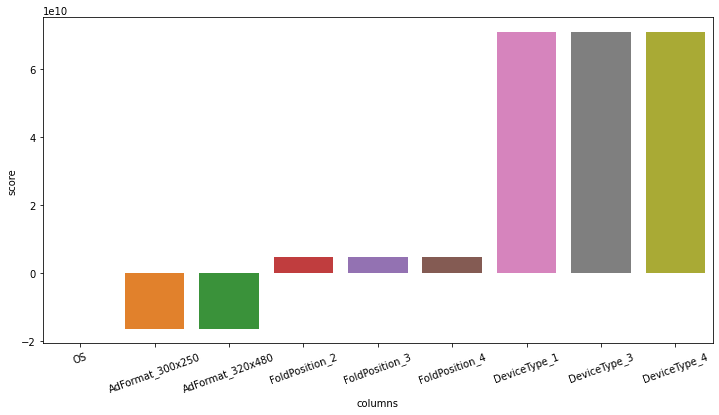

In [122]:
# Feature importance with Linear regretion, BY One Hot encoding
bar_plot(x='columns', y='score', df=oneHot_linear_importance)

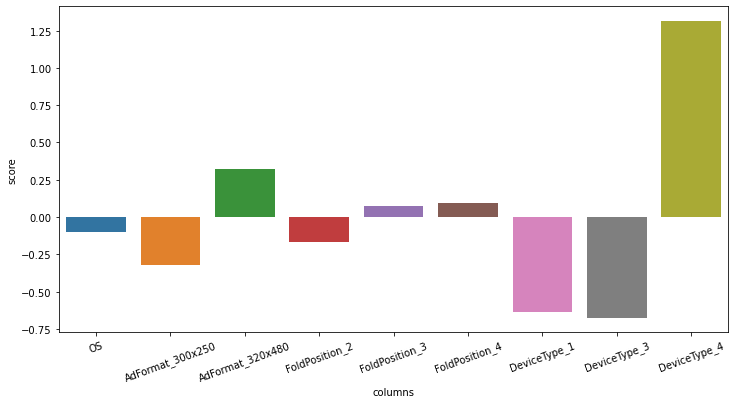

In [123]:
# Feature importance with Logistic regretion, by one hot encoding
bar_plot(x='columns', y='score', df=oneHot_logistics_importance)

## Label encoder Feature Importance Graph

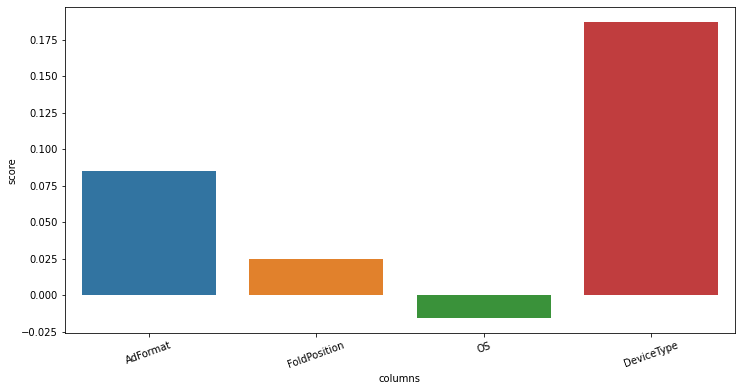

In [125]:
# Feature importance with Logistic regretion, by one hot encoding
bar_plot(x='columns', y='score', df=label_linear_importance)

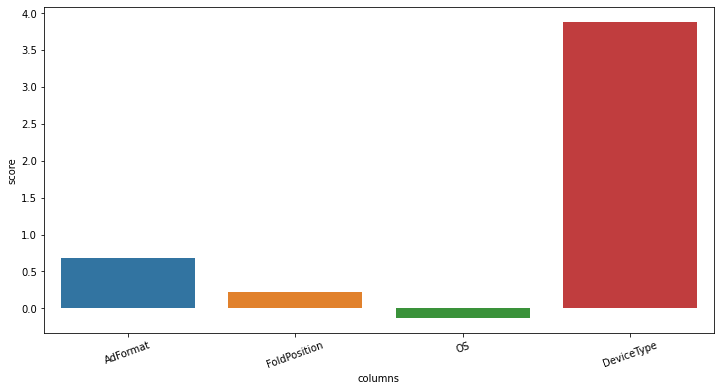

In [126]:
# Feature importance with Logistic regretion, by one hot encoding
bar_plot(x='columns', y='score', df=label_logistics_importance)

## CONCLUSION FROM THE ABOVE ANALYSIS

**Device type** has the highest decisiveness over all the other catagories on engagement

In [132]:
## checking mutual information score

In [130]:
x_values = label_scaled
y = target_column
for colmn in x_values.columns:
    print(f"{colmn} : ",mutual_info_score(x_values[colmn], y))


AdFormat :  0.0067203492354639405
FoldPosition :  0.00043855439227317994
OS :  0.001483773343128503
DeviceType :  0.005620998963784436


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
